In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


# Importing the Essential Libraries, Metrics

In [2]:
# Import Necessary liabraires 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis

In [5]:
df.shape

(1338, 7)

**Taking a look at the first 5 rows of the dataset**

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Getting the statistical summary of dataset**

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Learning the dtypes of columns and how many non-null values are there in those columns**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Checking for the missing values**

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [18]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

# Visualization

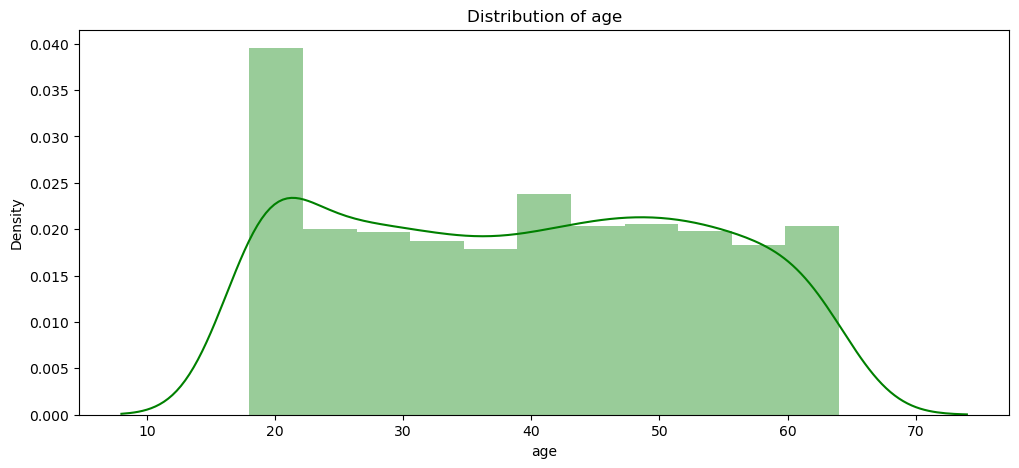

In [19]:
import matplotlib.pyplot as pl
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')

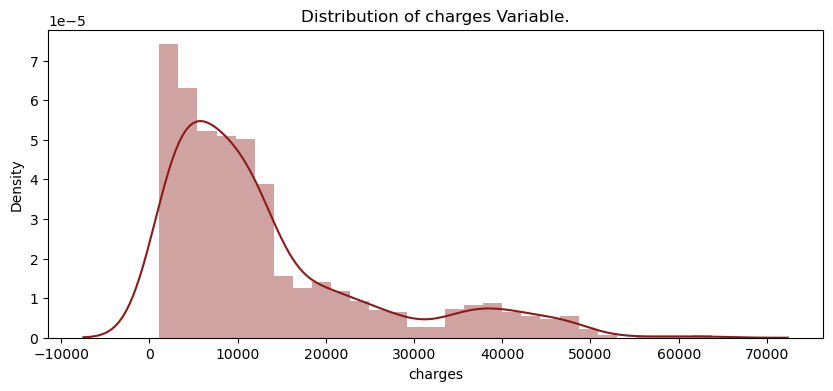

In [20]:
plt.figure(figsize=(10,4))
plt.title("Distribution of charges Variable.")
sns.distplot(df['charges'],color='#8B1A1A');

In [21]:
# Apply log transformation to charges

df['charges'] = np.log(df['charges'])

In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268661
1334,18,female,31.920,0,no,northeast,7.698927
1335,18,female,36.850,0,no,southeast,7.396233
1336,21,female,25.800,0,no,southwest,7.604867


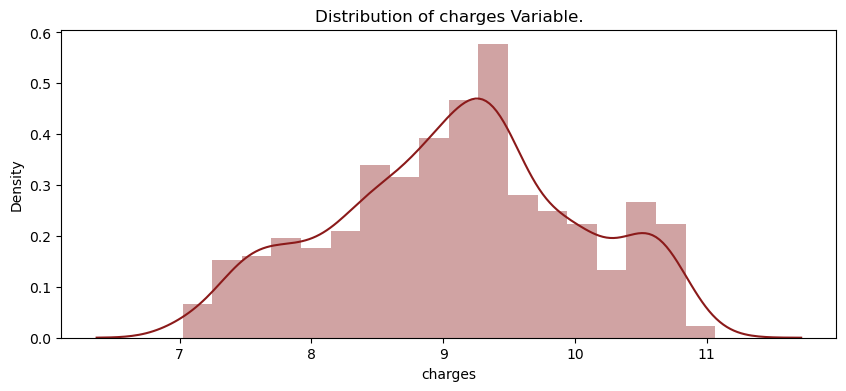

In [23]:
plt.figure(figsize=(10,4))
plt.title("Distribution of charges Variable.")
sns.distplot(df['charges'],color='#8B1A1A');

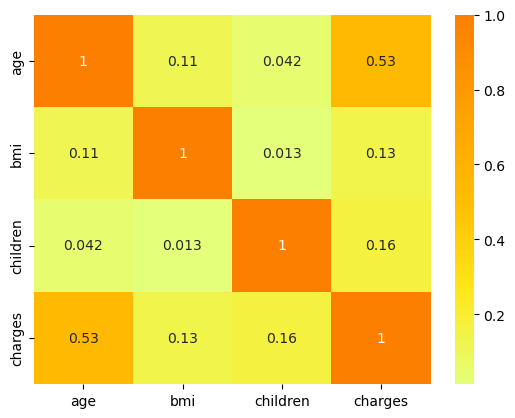

In [25]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [26]:
age_18_25 = df.age[(df.age >= 18) & (df.age <= 25)]
age_26_35 = df.age[(df.age >= 26) & (df.age <= 35)]
age_36_45 = df.age[(df.age >= 36) & (df.age <= 45)]
age_46_55 = df.age[(df.age >= 46) & (df.age <= 55)]
age_55above = df.age[df.age >= 55]

In [34]:
x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = df, x = x_age, y = y_age, color = x_age, template = 'plotly_dark',
       title = 'Number of patients per age group')

* **We can say that there is some relation between age and charges, as the age increases charges also increases.**
* **Surprisingly age group 18-25 have the highest patients.**

In [28]:
# Filter the data to only include individuals who have childrens
parents = df[df['children']>0]

# Display the number of people who have insurance
print('Number of people who have insurance: ',len(parents))

Number of people who have insurance:  764


In [29]:
# Display the age of each person who has childrens
print('Age of people who have childrens: ')
print(parents[['age','children']])

Age of people who have childrens: 
      age  children
1      18         1
2      28         3
6      46         1
7      37         3
8      37         2
...   ...       ...
1328   23         2
1329   52         2
1330   57         2
1332   52         3
1333   50         3

[764 rows x 2 columns]


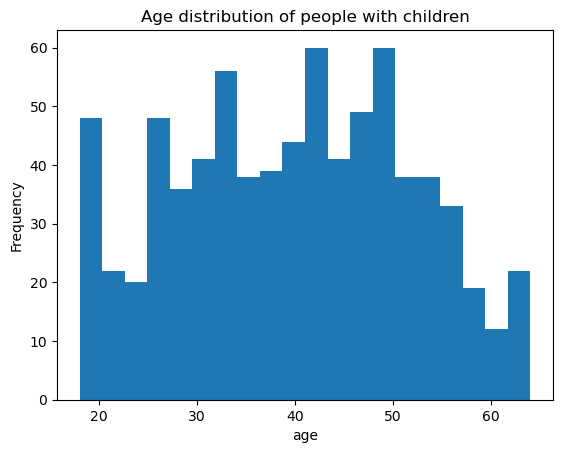

In [31]:
# Create a histogram of the age distribution of people who have children
plt.hist(parents['age'],bins=20)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age distribution of people with children')
plt.show()

**Encoding the categorical features of dataset by using One-Hot Encoding method**

In [35]:
# Convert categorical variables to numerical variables using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

**Splitting the data into X and y chunks**

In [36]:
X = df.drop(['charges'], axis=1)
Y = df['charges']

In [37]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,1,0,0,1,0,0,0,1
1,18,33.770,1,7.453302,0,1,1,0,0,0,1,0
2,28,33.000,3,8.400538,0,1,1,0,0,0,1,0
3,33,22.705,0,9.998092,0,1,1,0,0,1,0,0
4,32,28.880,0,8.260197,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,0,1,1,0,0,1,0,0
1334,18,31.920,0,7.698927,1,0,1,0,1,0,0,0
1335,18,36.850,0,7.396233,1,0,1,0,0,0,1,0
1336,21,25.800,0,7.604867,1,0,1,0,0,0,0,1


# Train-Test Split

**Splitting the data into Train and Test chunks for better evaluation**

In [38]:
# Split the data into training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Lasso Regression

In [39]:
model = Lasso()
model.fit(X_train, Y_train)

Lasso()

In [40]:
y_pred = model.predict(X_train)
y_pred1=model.predict(X_test)
score = np.sqrt(mean_squared_error(Y_train, y_pred))
score1= np.sqrt(mean_squared_error(Y_test, y_pred1))
r2 = r2_score(Y_train, y_pred)
r21 = r2_score(Y_test, y_pred1)
print("Train rmse", score)
print("Train R-squared:", r2)
print("~"*100)
print("Test rmse", score1)
print("Test R-squared:", r21)

Train rmse 0.778570343167373
Train R-squared: 0.26235902555835866
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test rmse 0.8105720995253373
Test R-squared: 0.2921339739071497
